In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
df_selected = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(df_selected)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
print(df_scaled )


[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
print("kmeans_labels:",kmeans_labels)

kmeans_labels: [2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 1 1 2 1 0 1 0 1 0 1 2 1 2 1 0 1 2 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1]
KMeans(n_clusters=3, random_state=42)


In [8]:
df['KMeans_Label'] = kmeans_labels

In [9]:
Z = linkage(df_scaled, method='ward')
hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')

In [11]:
print(Z)
print("hierarchical_labels :",hierarchical_labels )

[[6.50000000e+01 6.80000000e+01 7.17666897e-02 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 7.17666897e-02 2.00000000e+00]
 [1.06000000e+02 1.09000000e+02 7.76431214e-02 2.00000000e+00]
 [3.00000000e+00 5.00000000e+00 9.00803899e-02 2.00000000e+00]
 [9.20000000e+01 9.60000000e+01 1.05730374e-01 2.00000000e+00]
 [1.14000000e+02 1.15000000e+02 1.05730374e-01 2.00000000e+00]
 [1.33000000e+02 1.37000000e+02 1.12409152e-01 2.00000000e+00]
 [1.60000000e+01 2.00000000e+01 1.14508288e-01 2.00000000e+00]
 [6.00000000e+01 7.00000000e+01 1.20910138e-01 2.00000000e+00]
 [1.17000000e+02 1.19000000e+02 1.30409100e-01 2.00000000e+00]
 [1.50000000e+02 1.52000000e+02 1.36800877e-01 2.00000000e+00]
 [1.12000000e+02 1.21000000e+02 1.38349565e-01 2.00000000e+00]
 [4.80000000e+01 4.90000000e+01 1.43533379e-01 2.00000000e+00]
 [1.13000000e+02 2.05000000e+02 1.47460919e-01 3.00000000e+00]
 [1.00000000e+02 1.05000000e+02 1.48690768e-01 2.00000000e+00]
 [1.01000000e+02 2.04000000e+02 1.52386138e-01 3.000000

In [12]:
df['Hierarchical_Label'] = hierarchical_labels

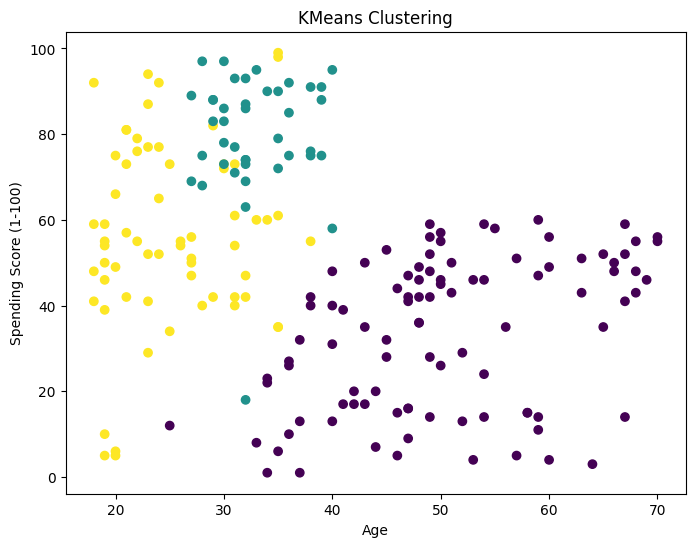

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['KMeans_Label'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

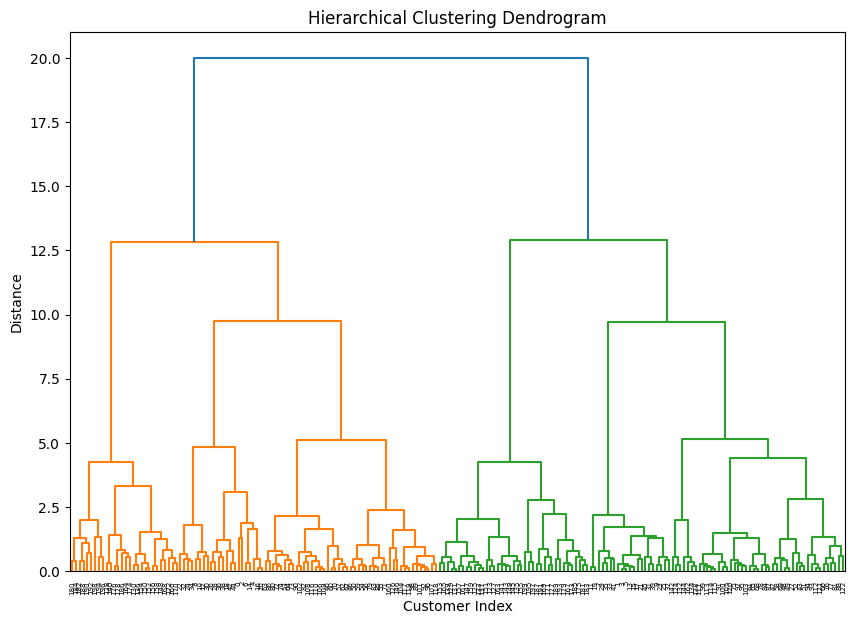

In [14]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [15]:
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(df_scaled, hierarchical_labels)

In [17]:
print("kmeans_silhouette:",kmeans_silhouette)
print("hierarchical_silhouette:",hierarchical_silhouette)

kmeans_silhouette: 0.3579234303882264
hierarchical_silhouette: 0.32148866683112387


In [19]:
kmeans_cluster_summary = df.groupby('KMeans_Label').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
})

print(kmeans_cluster_summary)


                    Age            Annual Income (k$)             \
                   mean        std               mean        std   
KMeans_Label                                                       
0             50.406250  10.349247          60.468750  23.704298   
1             32.853659   3.811568          87.341463  17.985563   
2             25.142857   5.599128          43.269841  19.141415   

             Spending Score (1-100)             
                               mean        std  
KMeans_Label                                    
0                         33.343750  17.734788  
1                         79.975610  13.997299  
2                         56.507937  21.572737  
